In [1]:
#**Price elasticity of a burger menu**

In [2]:
##*This contains the supporting code, visualizations and model output for a big data analytics research project on price optimization.*
###By Dina Jawad 
###CIND820

In [3]:
###Descriptive statistics of the dataset

In [4]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
###Data dictionary of the fields in the dataset

#The column names appear appropriate, so they will not be modified.

#STORE = store number
#CALENDAR_DATE = date of purchase
#PRICE = cost per item	
#QUANTITY = quantity purchased
#SELL_ID = ID for item group
#SELL_CATEGORY = category of item 0 = one item, 2= combo
#ITEM_ID = ID for individual item
#ITEM_NAME = name of item
#YEAR	= year of purchase
#HOLIDAY = holiday name
#IS_WEEKEND	= 0 not weekend, 1 = weekend
#IS_SCHOOLBREAK =0 not schoolbreak, 1 = schoolbreak
#AVERAGE_TEMPERATURE = in fahrenheit
#IS_OUTDOOR = 0 not outdoors, 1= outdoors 

In [6]:
#Let's have a quick overview of the 3 dataframes we have

In [7]:
url1 ='https://raw.githubusercontent.com/ewfruitcake/burgerpricing/main/Cafe%20-%20Transaction%20-%20Store.csv'
df1 = pd.read_csv(url1)
print(df1.head(5))

   STORE CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY
0      1        1/1/12  15.50        46     1070              0
1      1        1/1/12  12.73        22     2051              2
2      1        1/1/12  12.75        18     2052              2
3      1        1/1/12  12.60        30     2053              2
4      1        1/2/12  15.50        70     1070              0


In [8]:
url2 ='https://raw.githubusercontent.com/ewfruitcake/burgerpricing/main/Cafe%20-%20Sell%20Meta%20Data.csv'
df2 = pd.read_csv(url2)
print(df2.head(13))

    SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME
0      1070              0     7821    BURGER
1      3055              0     3052    COFFEE
2      3067              0     5030      COKE
3      3028              0     6249  LEMONADE
4      2051              2     7821    BURGER
5      2051              2     5030      COKE
6      2052              2     7821    BURGER
7      2052              2     6249  LEMONADE
8      2053              2     7821    BURGER
9      2053              2     5030      COKE
10     2053              2     3052    COFFEE


In [9]:
url3 ='https://raw.githubusercontent.com/ewfruitcake/burgerpricing/main/DateInfo.csv'
df3 = pd.read_csv(url3)
print(df3.head(5))

  CALENDAR_DATE  YEAR   HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
0        1/1/12  2012  New Year           1               0   
1        1/2/12  2012  New Year           0               0   
2        1/3/12  2012  New Year           0               0   
3        1/4/12  2012       NaN           0               0   
4        1/5/12  2012       NaN           0               0   

   AVERAGE_TEMPERATURE  IS_OUTDOOR  
0                 24.8           0  
1                 24.8           0  
2                 32.0           1  
3                 32.0           1  
4                 24.8           0  


In [10]:
###We have 3 dataframes that should be merged/joined together on the basis of the linked columns. Let's merge them.
df=df1.merge(df2,on='SELL_ID').merge(df3,on='CALENDAR_DATE')
print(df.head(5))

   STORE CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY_x  \
0      1        1/1/12  15.50        46     1070                0   
1      1        1/1/12  12.73        22     2051                2   
2      1        1/1/12  12.73        22     2051                2   
3      1        1/1/12  12.75        18     2052                2   
4      1        1/1/12  12.75        18     2052                2   

   SELL_CATEGORY_y  ITEM_ID ITEM_NAME  YEAR   HOLIDAY  IS_WEEKEND  \
0                0     7821    BURGER  2012  New Year           1   
1                2     7821    BURGER  2012  New Year           1   
2                2     5030      COKE  2012  New Year           1   
3                2     7821    BURGER  2012  New Year           1   
4                2     6249  LEMONADE  2012  New Year           1   

   IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0               0                 24.8           0  
1               0                 24.8           0  
2          

In [11]:
print("Means of dataset features")
print(df.mean())
print("")
print("Standard Deviations of dataset features")
print(df.std())

Means of dataset features
STORE                     1.000000
PRICE                    12.469232
QUANTITY                 39.928044
SELL_ID                1929.375000
SELL_CATEGORY_x           1.750000
SELL_CATEGORY_y           1.750000
ITEM_ID                6330.625000
YEAR                   2013.373432
IS_WEEKEND                0.284133
IS_SCHOOLBREAK            0.203690
AVERAGE_TEMPERATURE      56.234244
IS_OUTDOOR                0.862731
dtype: float64

Standard Deviatiations of dataset features
STORE                     0.000000
PRICE                     1.332332
QUANTITY                 20.937454
SELL_ID                 324.829137
SELL_CATEGORY_x           0.661468
SELL_CATEGORY_y           0.661468
ITEM_ID                1696.551284
YEAR                      1.070637
IS_WEEKEND                0.451021
IS_SCHOOLBREAK            0.402760
AVERAGE_TEMPERATURE      20.224510
IS_OUTDOOR                0.344147
dtype: float64


C:\Users\dinaj\AppData\Local\Temp\ipykernel_3844\3107124389.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
C:\Users\dinaj\AppData\Local\Temp\ipykernel_3844\3107124389.py:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.std())


In [12]:
#Some clean-up is required after merging the dataframes.

#Let's drop SELL_CATEGORY_y as it is a duplicate of SELL_CATEGORY_x
df.drop('SELL_CATEGORY_y', axis=1, inplace=True)

In [13]:
#Cleanup continued:
#Let's rename SELL_CATEGORY_x to SELL_CATEGORY 
df = df.rename(columns={'SELL_CATEGORY_x': 'SELL_CATEGORY'})

In [14]:
df.info() #noting that I do convert the dtypes in the next few steps for a select # of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STORE                10840 non-null  int64  
 1   CALENDAR_DATE        10840 non-null  object 
 2   PRICE                10840 non-null  float64
 3   QUANTITY             10840 non-null  int64  
 4   SELL_ID              10840 non-null  int64  
 5   SELL_CATEGORY        10840 non-null  int64  
 6   ITEM_ID              10840 non-null  int64  
 7   ITEM_NAME            10840 non-null  object 
 8   YEAR                 10840 non-null  int64  
 9   HOLIDAY              840 non-null    object 
 10  IS_WEEKEND           10840 non-null  int64  
 11  IS_SCHOOLBREAK       10840 non-null  int64  
 12  AVERAGE_TEMPERATURE  10840 non-null  float64
 13  IS_OUTDOOR           10840 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ MB


In [15]:
#Deciding whether or not to convert some of the character/string columns to category data type
#Let's check the unique # of occurrences to make a decision
print('\033[1m' + 'Count of unique occurrences for the character/string columns:' + '\033[0m')
print('ITEM_NAME =', df['ITEM_NAME'].nunique())
print('HOLIDAY =', df['HOLIDAY'].nunique())
#Based on the output, it makes sense to convert those columns to character type

Count of unique occurrences for the character/string columns:
ITEM_NAME = 4
HOLIDAY = 8


In [16]:
#Converting character/string to appropriate data types for more efficient memory usage & faster processing
#Some to category data type, some to date type
df['ITEM_NAME'] = df['ITEM_NAME'].astype('category')
df['HOLIDAY'] = df['HOLIDAY'].astype('category')
df['CALENDAR_DATE'] = pd.to_datetime(df["CALENDAR_DATE"],format="%m/%d/%y")

#Checking my work:
df.info() #(1)you can see that the memory usage has improved, (2) the data types have also been updated

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   STORE                10840 non-null  int64         
 1   CALENDAR_DATE        10840 non-null  datetime64[ns]
 2   PRICE                10840 non-null  float64       
 3   QUANTITY             10840 non-null  int64         
 4   SELL_ID              10840 non-null  int64         
 5   SELL_CATEGORY        10840 non-null  int64         
 6   ITEM_ID              10840 non-null  int64         
 7   ITEM_NAME            10840 non-null  category      
 8   YEAR                 10840 non-null  int64         
 9   HOLIDAY              840 non-null    category      
 10  IS_WEEKEND           10840 non-null  int64         
 11  IS_SCHOOLBREAK       10840 non-null  int64         
 12  AVERAGE_TEMPERATURE  10840 non-null  float64       
 13  IS_OUTDOOR           10840 non-

In [17]:
#Checking for missing values
df.isnull().sum()
#It appears that all the missing values lie in the 'HOLIDAY' column

STORE                      0
CALENDAR_DATE              0
PRICE                      0
QUANTITY                   0
SELL_ID                    0
SELL_CATEGORY              0
ITEM_ID                    0
ITEM_NAME                  0
YEAR                       0
HOLIDAY                10000
IS_WEEKEND                 0
IS_SCHOOLBREAK             0
AVERAGE_TEMPERATURE        0
IS_OUTDOOR                 0
dtype: int64

In [18]:
###Applicable attributes and unususal patterns

In [19]:
#Let's visualize the dataset variables and check the descriptive stats to help uncover patterns

In [20]:
#Checking descriptive stats on our new combined dataframe for each variable
df.describe()
#Notably the mean price is $12.47 and mean quantity is 39.93

,STORE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,ITEM_ID,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,10840.0,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.00000,10840.000000,10840.000000
mean,1.0,12.469232,39.928044,1929.375000,1.750000,6330.625000,2013.373432,0.284133,0.20369,56.234244,0.862731
std,0.0,1.332332,20.937454,324.829137,0.661468,1696.551284,1.070637,0.451021,0.40276,20.224510,0.344147
min,1.0,10.120000,8.000000,1070.000000,0.000000,3052.000000,2012.000000,0.000000,0.00000,14.000000,0.000000
25%,1.0,11.480000,24.000000,2051.000000,2.000000,5030.000000,2012.000000,0.000000,0.00000,35.600000,1.000000
50%,1.0,12.460000,34.000000,2052.000000,2.000000,7035.000000,2013.000000,0.000000,0.00000,60.800000,1.000000
75%,1.0,12.850000,50.000000,2053.000000,2.000000,7821.000000,2014.000000,1.000000,0.00000,75.200000,1.000000
max,1.0,16.500000,124.000000,2053.000000,2.000000,7821.000000,2015.000000,1.000000,1.00000,87.800000,1.000000


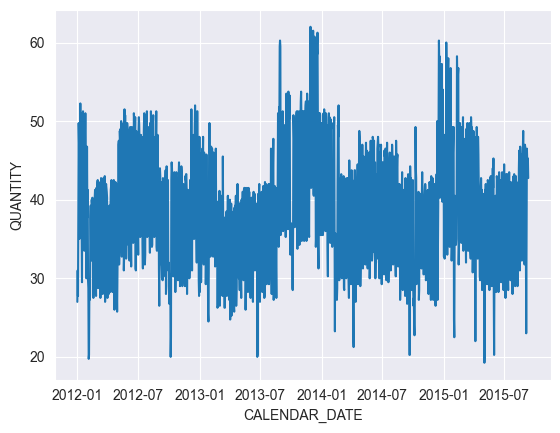

In [21]:
sns.set_style('darkgrid')
sns.lineplot(data=df, x='CALENDAR_DATE', y='QUANTITY', errorbar=None)
plt.show()
#The most quantity of sales are showing in early 2014 and early 2015 (winter time), a pattern might be evident with regards to time of year.

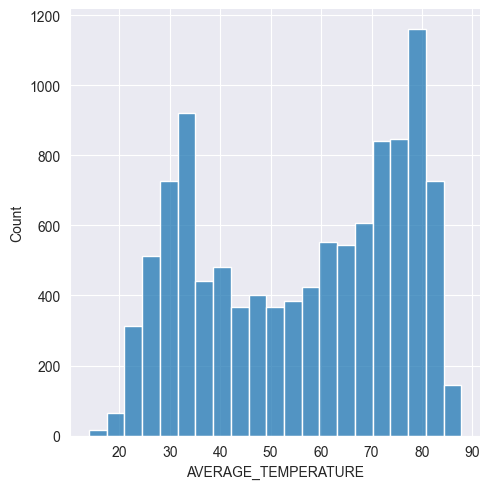

In [22]:
sns.set_style('darkgrid')
sns.displot(df.AVERAGE_TEMPERATURE)
#The distribution for temperature appears to be bi-modal, with most sales happening somewhere around 35F, and around 80F

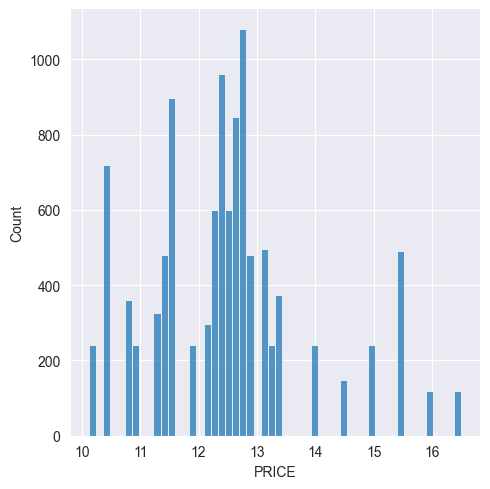

In [23]:
sns.set_style('darkgrid')
sns.displot(df.PRICE)
#Price appears to be at  least bimodal (2 peaks) or multimodal(3 peaks). We see peaks at around $10.25, $11.50, and $12.75
#There is a possibility this is due to the categories of different groups of items being grouped together.

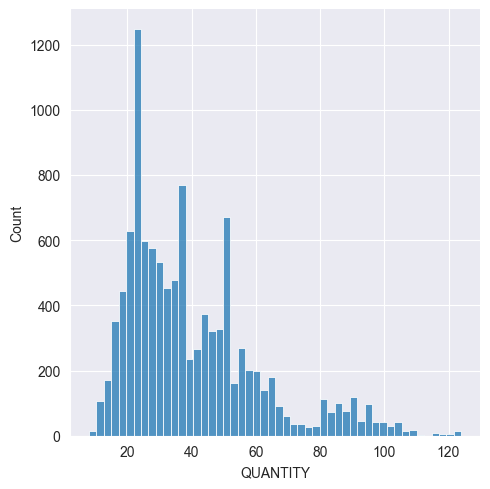

In [24]:
sns.set_style('darkgrid')
sns.displot(df.QUANTITY)
#Quantity appears to be at least bimodal (2 peaks) or multimodal(3 peaks). Around quantity 25, 38 and 52 appear to be the most frequent occurrences for transaction sales.
#There is a possibility this is due to the categories of different groups of items being grouped together.

<Axes: xlabel='ITEM_NAME', ylabel='PRICE'>

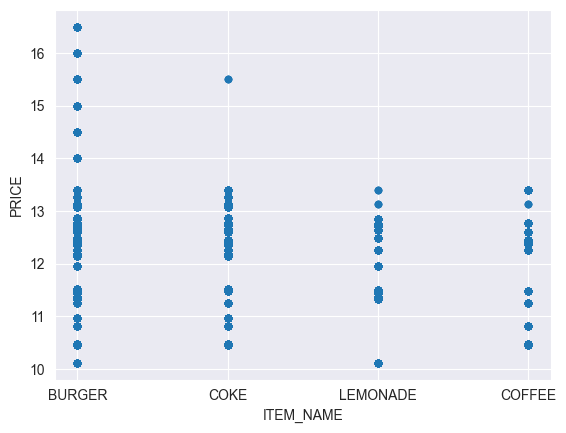

In [25]:
df.plot(x="ITEM_NAME", y="PRICE", kind="scatter")
#All beverages appear to be very closely priced together.

<Axes: xlabel='QUANTITY', ylabel='PRICE'>

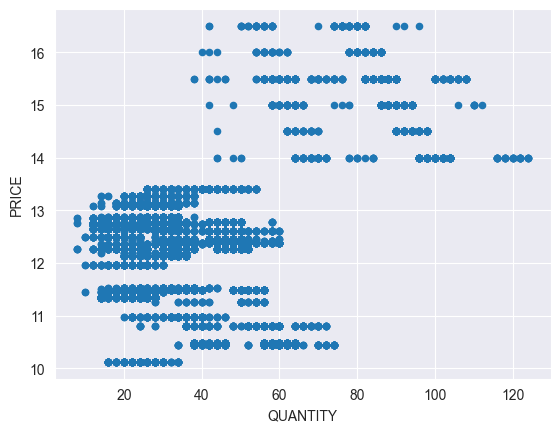

In [26]:
df.plot(x="QUANTITY", y="PRICE", kind="scatter")
#There appear to be a more densely packed number of transactions between price at $12-$13.25 and quantity of 40.

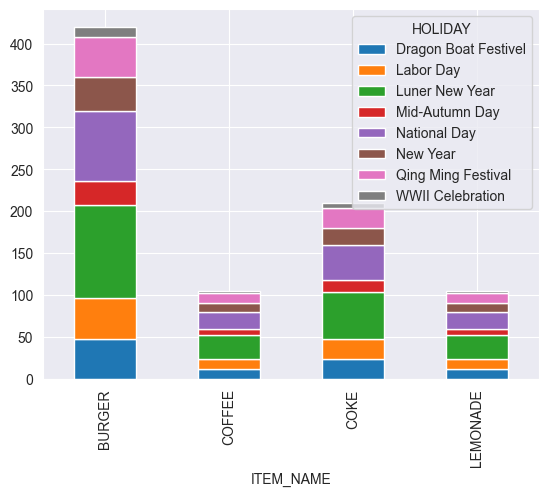

In [27]:
df.groupby(['ITEM_NAME','HOLIDAY']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#Lunar New Year, National Day, and Qing Ming Festival have the most sales by indvidual item. 

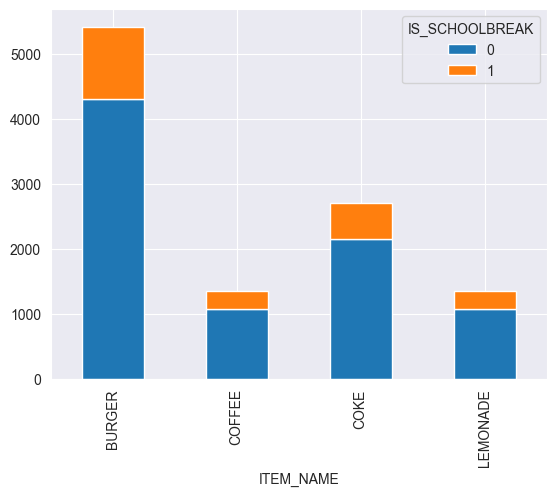

In [28]:
df.groupby(['ITEM_NAME','IS_SCHOOLBREAK']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#Sales transactions during school breaks are much less than sales during the school year for most products. 
#Burgers and coke still do better during breaks, than coffee and lemonade.

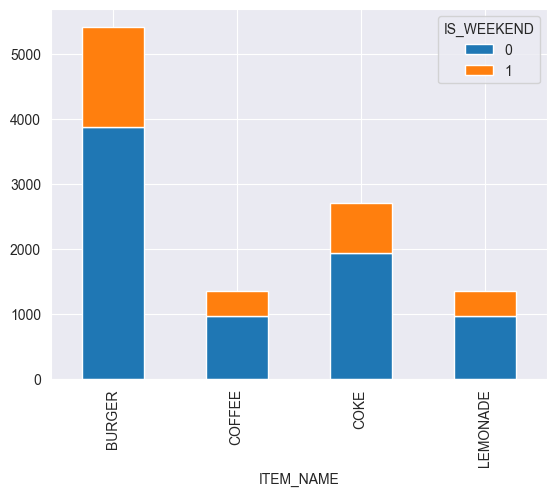

In [29]:
df.groupby(['ITEM_NAME','IS_WEEKEND']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#Most sales happen during the week, which makes sense.


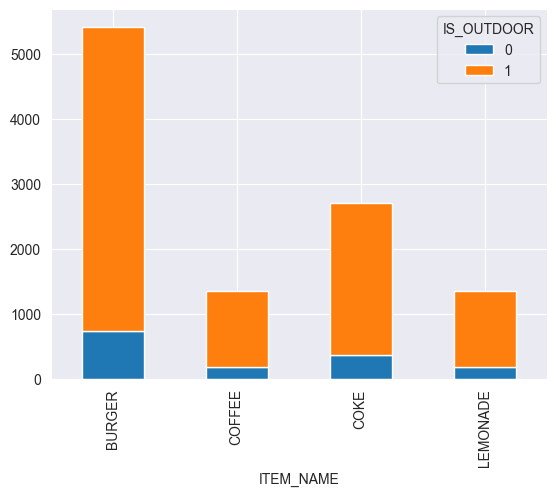

In [30]:
df.groupby(['ITEM_NAME','IS_OUTDOOR']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
#Most items sold are outdoors.

<Axes: ylabel='SELL_CATEGORY'>

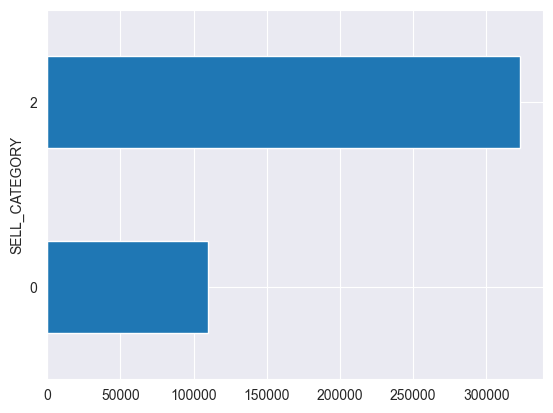

In [31]:
category_totals = df.groupby("SELL_CATEGORY")["QUANTITY"].sum().sort_values()
category_totals.plot(kind="barh", fontsize=10)
#Most sales transactions are for combos than individual items.

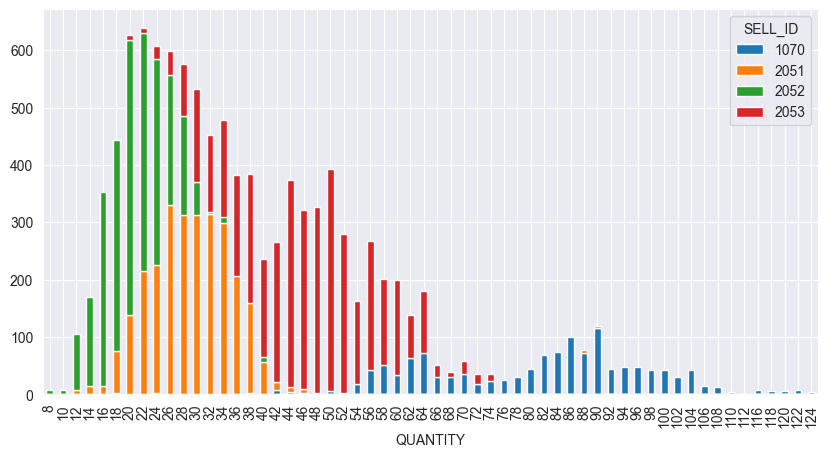

In [32]:
df.groupby(['QUANTITY','SELL_ID']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,5))
plt.show()
#Sell_ID 2052 (Burger and Lemonade) and 2051 (Burger and Coke) comprise the highest frequency of transactions(500+), and are purchased in quantities of 20-30. 
#Sell_ID refers to different item groups.
#We see a lessor frequency of Sell_ID 1070 (Burger on it's own), but the quantity range is higher.

In [33]:
#Dependent & Independent Variable selection

In [34]:
#The dependent variable will be quantity and the independent will be price along with other independent variables for optimizing price by product and time of year.

In [35]:
#Outlier detection

<Axes: xlabel='PRICE'>

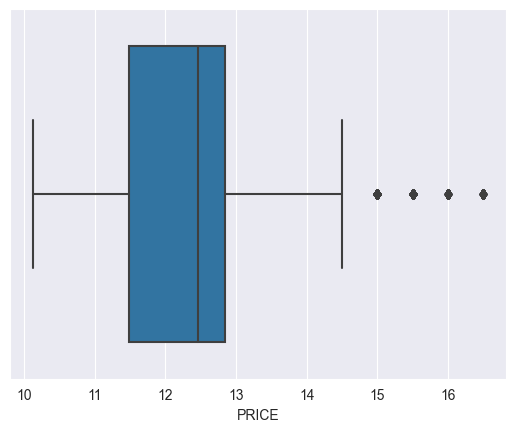

In [36]:
import seaborn as sns
sns.boxplot(x='PRICE', data=df)
#We do see quite a number of outliers for price when price > $15

<Axes: xlabel='QUANTITY'>

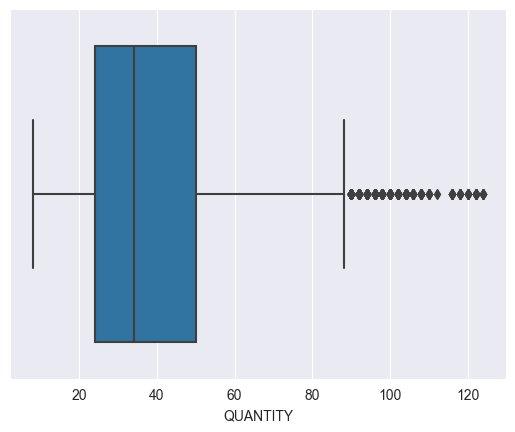

In [37]:
import seaborn as sns
sns.boxplot(x='QUANTITY', data=df)
#We do see quite a number of outliers for quantity when quantity is reoughly >88 or so

In [38]:
#We can either remove the outliers now for price and quantity, or transform both price and quantity and see whether or not that helps. We will wait to see the results of transforming.

C:\Users\dinaj\AppData\Local\Temp\ipykernel_3844\969296864.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


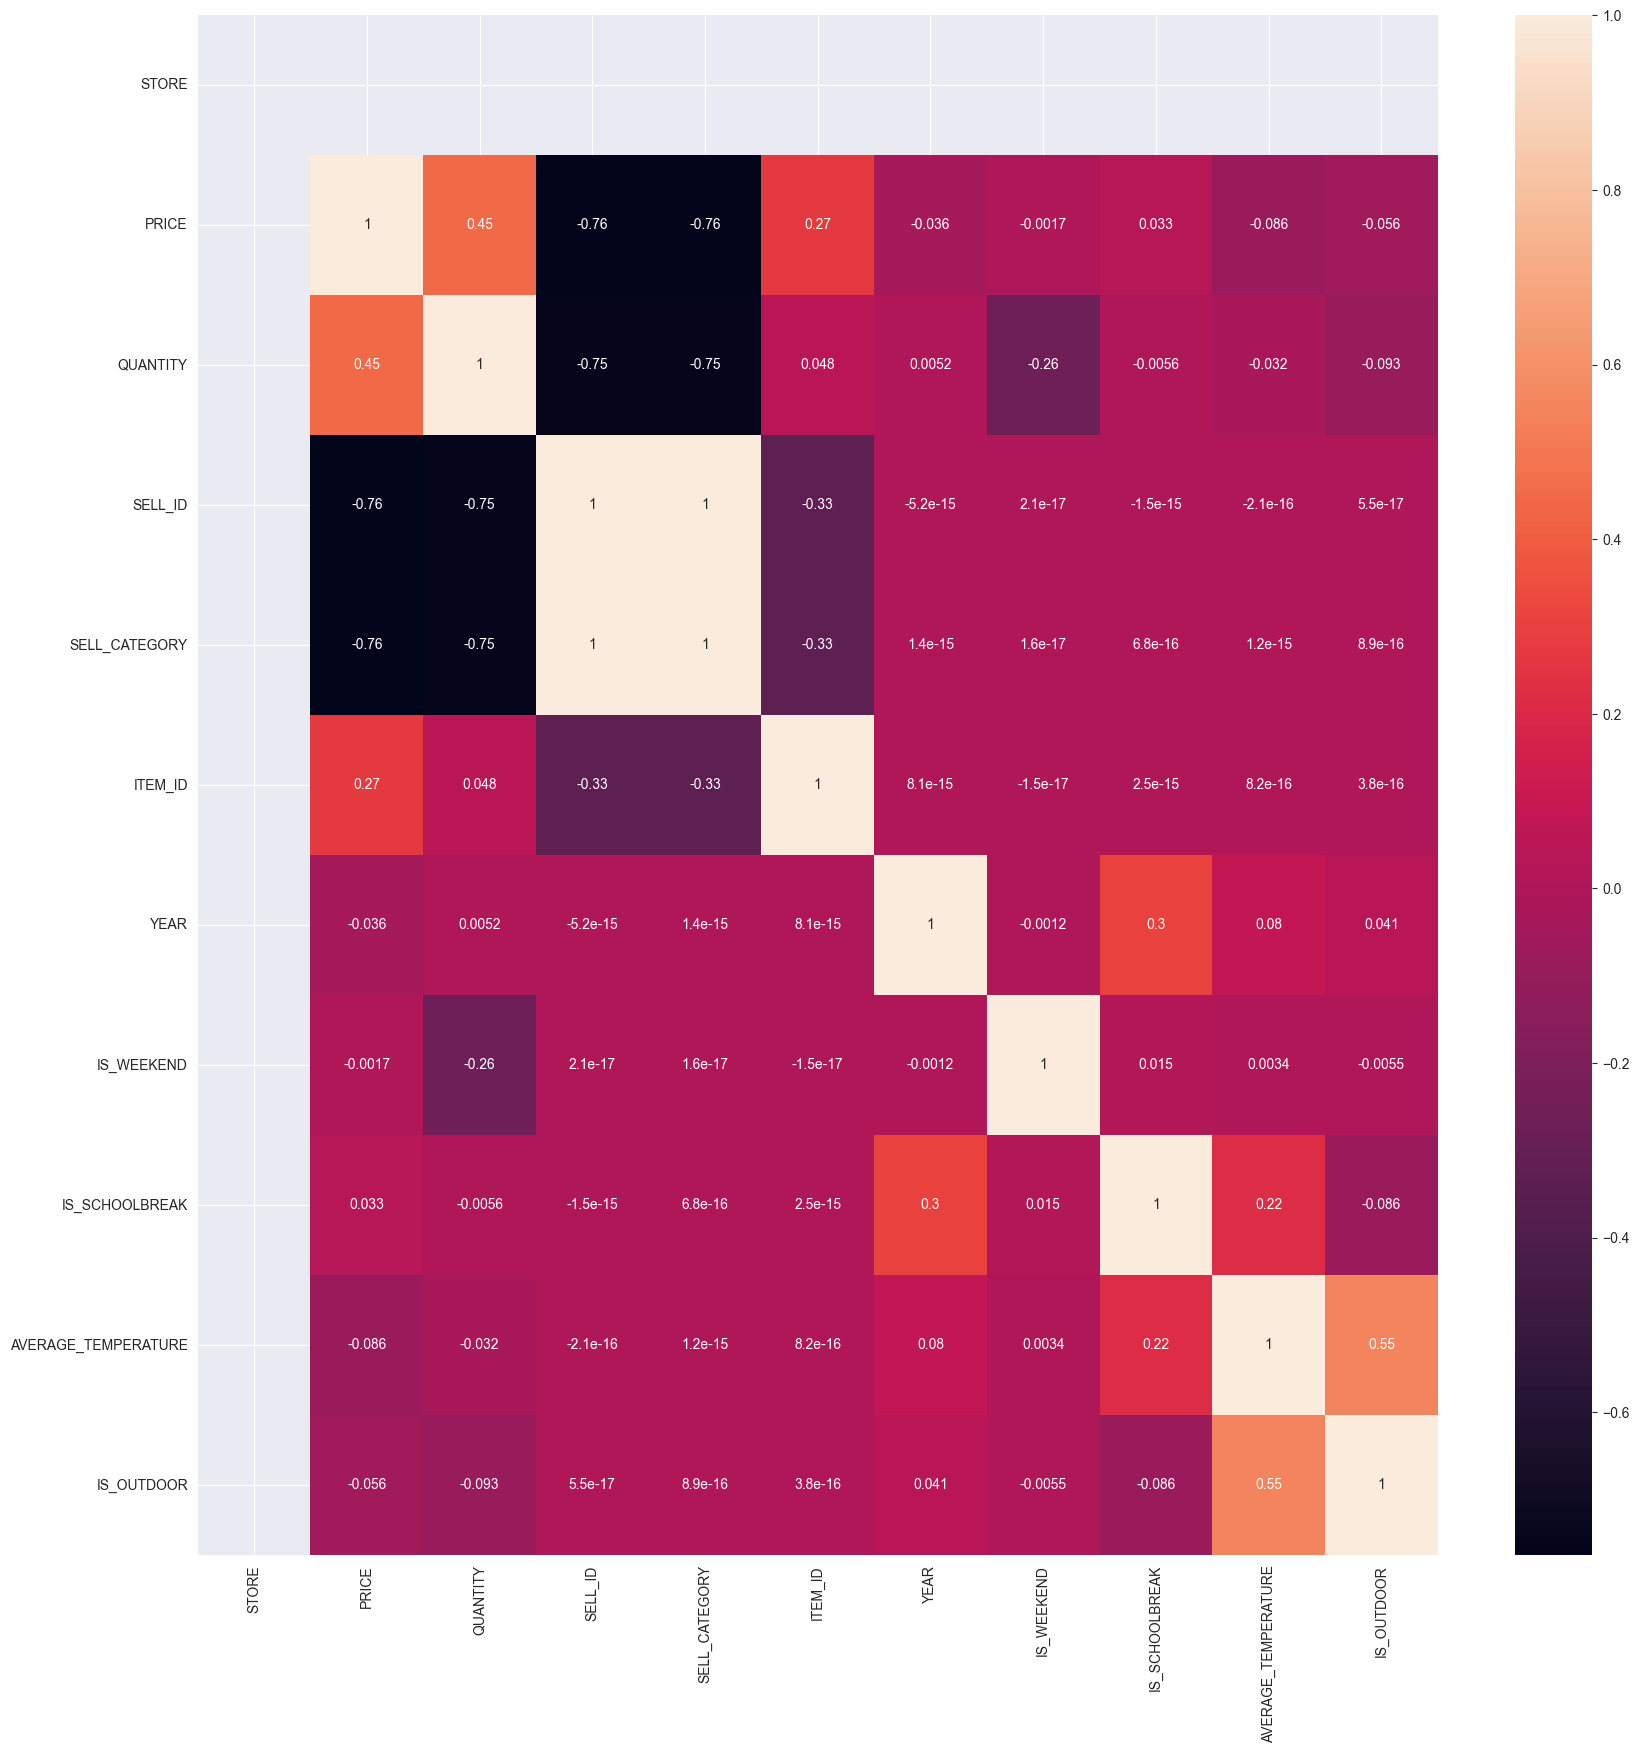

STORE       STORE                       NaN
            PRICE                       NaN
            QUANTITY                    NaN
            SELL_ID                     NaN
            SELL_CATEGORY               NaN
                                     ...   
IS_OUTDOOR  YEAR                   0.040981
            IS_WEEKEND            -0.005475
            IS_SCHOOLBREAK        -0.085803
            AVERAGE_TEMPERATURE    0.549761
            IS_OUTDOOR             1.000000
Length: 121, dtype: float64


In [39]:
#Correlation shows you how the two variables are related / strength of the relationship between the two variables. 
#This may aid in dimensionality reduction.
corr_matrix = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

corr_matrix_small = corr_matrix
corr_pairs = corr_matrix_small.unstack()
print(corr_pairs)
pd.set_option('display.max_rows', 144)

In [40]:
#ascending
corr_pairs_sorted_a = corr_pairs.sort_values(kind="quicksort")
print(corr_pairs_sorted_a)

#Most notable pairs are listed here:
#PRICE                SELL_ID               -7.637177e-01
#SELL_ID              PRICE                 -7.637177e-01
#SELL_CATEGORY        PRICE                 -7.634237e-01
#PRICE                SELL_CATEGORY         -7.634237e-01
#SELL_CATEGORY        QUANTITY              -7.472371e-01
#QUANTITY             SELL_CATEGORY         -7.472371e-01
#SELL_ID              QUANTITY              -7.463939e-01
#QUANTITY             SELL_ID               -7.463939e-01
#SELL_ID              ITEM_ID               -3.327415e-01
#ITEM_ID              SELL_ID               -3.327415e-01
#SELL_CATEGORY        ITEM_ID               -3.320470e-01
#ITEM_ID              SELL_CATEGORY         -3.320470e-01
#IS_WEEKEND           QUANTITY              -2.645138e-01
#QUANTITY             IS_WEEKEND            -2.645138e-01

PRICE                SELL_ID               -7.637177e-01
SELL_ID              PRICE                 -7.637177e-01
SELL_CATEGORY        PRICE                 -7.634237e-01
PRICE                SELL_CATEGORY         -7.634237e-01
SELL_CATEGORY        QUANTITY              -7.472371e-01
QUANTITY             SELL_CATEGORY         -7.472371e-01
SELL_ID              QUANTITY              -7.463939e-01
QUANTITY             SELL_ID               -7.463939e-01
SELL_ID              ITEM_ID               -3.327415e-01
ITEM_ID              SELL_ID               -3.327415e-01
SELL_CATEGORY        ITEM_ID               -3.320470e-01
ITEM_ID              SELL_CATEGORY         -3.320470e-01
IS_WEEKEND           QUANTITY              -2.645138e-01
QUANTITY             IS_WEEKEND            -2.645138e-01
IS_OUTDOOR           QUANTITY              -9.332856e-02
QUANTITY             IS_OUTDOOR            -9.332856e-02
AVERAGE_TEMPERATURE  PRICE                 -8.630149e-02
PRICE                AVERAGE_TE

In [41]:
corr_pairs_sorted_d = corr_pairs.sort_values(kind="quicksort", ascending=False)
print(corr_pairs_sorted_d)

#Most notable pairs are listed here:

#SELL_CATEGORY        SELL_ID                9.999971e-01
#SELL_ID              SELL_CATEGORY          9.999971e-01
#AVERAGE_TEMPERATURE  IS_OUTDOOR             5.497614e-01
#IS_OUTDOOR           AVERAGE_TEMPERATURE    5.497614e-01
#QUANTITY             PRICE                  4.453556e-01
#PRICE                QUANTITY               4.453556e-01

PRICE                PRICE                  1.000000e+00
QUANTITY             QUANTITY               1.000000e+00
AVERAGE_TEMPERATURE  AVERAGE_TEMPERATURE    1.000000e+00
IS_SCHOOLBREAK       IS_SCHOOLBREAK         1.000000e+00
IS_WEEKEND           IS_WEEKEND             1.000000e+00
YEAR                 YEAR                   1.000000e+00
ITEM_ID              ITEM_ID                1.000000e+00
SELL_CATEGORY        SELL_CATEGORY          1.000000e+00
SELL_ID              SELL_ID                1.000000e+00
IS_OUTDOOR           IS_OUTDOOR             1.000000e+00
SELL_CATEGORY        SELL_ID                9.999971e-01
SELL_ID              SELL_CATEGORY          9.999971e-01
AVERAGE_TEMPERATURE  IS_OUTDOOR             5.497614e-01
IS_OUTDOOR           AVERAGE_TEMPERATURE    5.497614e-01
QUANTITY             PRICE                  4.453556e-01
PRICE                QUANTITY               4.453556e-01
YEAR                 IS_SCHOOLBREAK         3.045571e-01
IS_SCHOOLBREAK       YEAR      

In [43]:
###Standardization & Algorithm Considerations

In [44]:
#We will apply standardization as a pre-processing step to the variables prior to modelling. 
#This will place the features on a similar scale and help optimize the models.

In [45]:
#viewing dataset types to note which columns are numeric, that we'll normalize
df.dtypes

STORE                           int64
CALENDAR_DATE          datetime64[ns]
PRICE                         float64
QUANTITY                        int64
SELL_ID                         int64
SELL_CATEGORY                   int64
ITEM_ID                         int64
ITEM_NAME                    category
YEAR                            int64
HOLIDAY                      category
IS_WEEKEND                      int64
IS_SCHOOLBREAK                  int64
AVERAGE_TEMPERATURE           float64
IS_OUTDOOR                      int64
dtype: object

In [46]:
#defining a function to normalize
def normalize_function(x): 
    return ((x - min(x)) / (max(x) - min(x)))

In [47]:
print(df.iloc[:,[2,3,12]].head(5)) #preview of numeric column data before normalizing

   PRICE  QUANTITY  AVERAGE_TEMPERATURE
0  15.50        46                 24.8
1  12.73        22                 24.8
2  12.73        22                 24.8
3  12.75        18                 24.8
4  12.75        18                 24.8


In [48]:
df.iloc[:,[2,3,12]].mean()  #preview of numeric column data before normalizing, means

PRICE                  12.469232
QUANTITY               39.928044
AVERAGE_TEMPERATURE    56.234244
dtype: float64

In [49]:
df.iloc[:,[2,3,12]].std()  #preview of numeric column data before normalizing, standard deviations

PRICE                   1.332332
QUANTITY               20.937454
AVERAGE_TEMPERATURE    20.224510
dtype: float64

In [50]:
#normalize the numeric continuous data columns (PRICE, QUANTITY, AVERAGE_TEMPERATURE)
df.iloc[:,[2,3,12]] = df.iloc[:,[2,3,12]].apply(normalize_function)
df.iloc[:,[2,3,12]].apply(normalize_function)
print(df.iloc[:,[2,3,12]].head(5))
#now our data is normalized

      PRICE  QUANTITY  AVERAGE_TEMPERATURE
0  0.843260  0.327586             0.146341
1  0.409091  0.120690             0.146341
2  0.409091  0.120690             0.146341
3  0.412226  0.086207             0.146341
4  0.412226  0.086207             0.146341


In [51]:
df.iloc[:,[2,3,12]].mean() #numeric column data after normalizing, means are between 0-1

PRICE                  0.368218
QUANTITY               0.275242
AVERAGE_TEMPERATURE    0.572280
dtype: float64

In [52]:
df.iloc[:,[2,3,12]].std() #numeric column data after normalizing, standard deviations are between 0-1

PRICE                  0.208830
QUANTITY               0.180495
AVERAGE_TEMPERATURE    0.274045
dtype: float64

In [54]:
#importing libraries required
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler #no longer needed as I've manually scaled -> see sections [41] to [49]

In [55]:
df.dtypes

STORE                           int64
CALENDAR_DATE          datetime64[ns]
PRICE                         float64
QUANTITY                      float64
SELL_ID                         int64
SELL_CATEGORY                   int64
ITEM_ID                         int64
ITEM_NAME                    category
YEAR                            int64
HOLIDAY                      category
IS_WEEKEND                      int64
IS_SCHOOLBREAK                  int64
AVERAGE_TEMPERATURE           float64
IS_OUTDOOR                      int64
dtype: object

In [56]:
X = df.iloc[:, [2,4,5,6,8,10,11,12,13]] #PRICE, SELL_ID, SELL_CATEGORY, ITEM_ID, YEAR, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR
y = df.iloc[:, 3] #QUANTITY / dependent aka target variable
X.head()

,PRICE,SELL_ID,SELL_CATEGORY,ITEM_ID,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,0.843260,1070,0,7821,2012,1,0,0.146341,0
1,0.409091,2051,2,7821,2012,1,0,0.146341,0
2,0.409091,2051,2,5030,2012,1,0,0.146341,0
3,0.412226,2052,2,7821,2012,1,0,0.146341,0
4,0.412226,2052,2,6249,2012,1,0,0.146341,0


In [57]:
#As part of experimental design - to perform cross-validation on the dataset, we will use a 70/30 split; training (70%) and testing data (30%).
#This step will help ensure we are not testing the model on the same data we trained the model on.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 40) #randomly segregating dataset into testing and training data variables

In [59]:
X_train.head()

,PRICE,SELL_ID,SELL_CATEGORY,ITEM_ID,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
210,0.409091,2051,2,5030,2012,0,0,0.243902,1
3339,0.394984,2052,2,7821,2013,0,0,0.292683,1
892,0.412226,2052,2,6249,2012,1,0,0.585366,1
3872,0.843260,1070,0,7821,2013,0,0,0.707317,1
8818,0.221003,2051,2,5030,2015,0,0,0.317073,1


In [60]:
X_test.head()

,PRICE,SELL_ID,SELL_CATEGORY,ITEM_ID,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
8343,0.415361,2053,2,3052,2014,1,0,0.512195,1
10236,0.335423,2052,2,6249,2015,1,0,0.926829,1
7154,0.316614,2051,2,5030,2014,1,1,0.756098,1
9168,0.608150,1070,0,7821,2015,1,1,0.219512,1
945,0.409091,2051,2,7821,2012,1,0,0.658537,1


In [77]:
###Feature selection

In [78]:
#We will check if the variables we selected in our first scaled set has a low variance, and remove the applicable feature if necessary

In [79]:
from sklearn.feature_selection import VarianceThreshold

In [80]:
#X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

In [81]:
selector = VarianceThreshold(threshold=0)

In [82]:
selector.fit(X_train)

VarianceThreshold(threshold=0)

In [83]:
selector.get_support() 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [84]:
#Since the features all show "True", we should be okay to keep them as their variance thresholds are acceptable. We want to keep as much of the df elements until we find the best model.
#Time of year was an important element of the research questions. 
#We shall see if any of the time of year related features such as temperature/is school break/is weekend/is outdoor have a impact on the price elasticity of burgers.

In [85]:
print("shape of original dataset :", df.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (10840, 14)
shape of input - training set (7588, 9)
shape of output - training set (7588,)
shape of input - testing set (3252, 9)
shape of output - testing set (3252,)


In [86]:
###Modeling

In [87]:
#Three regression models will be applied to the data and evaluated for best fit.

In [88]:
#Model 1 - Linear regression model
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [89]:
model = sm.OLS(y_train, X_train).fit() 
print(model.summary())
results = model
results.get_prediction(X_test).summary_frame(alpha=0.05)
results.params

                                 OLS Regression Results                                
Dep. Variable:               QUANTITY   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                          1.094e+04
Date:                Mon, 17 Jul 2023   Prob (F-statistic):                        0.00
Time:                        20:23:47   Log-Likelihood:                          7709.7
No. Observations:                7588   AIC:                                 -1.540e+04
Df Residuals:                    7579   BIC:                                 -1.534e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

PRICE                  -0.223725
SELL_ID                 0.043286
SELL_CATEGORY         -21.527804
ITEM_ID                -0.000017
YEAR                   -0.022506
IS_WEEKEND             -0.105652
IS_SCHOOLBREAK          0.017040
AVERAGE_TEMPERATURE     0.005787
IS_OUTDOOR             -0.049035
dtype: float64

In [ ]:
#Evaluation of OLS Regression Results

#R-squared: 
#0.928; rather high using this model. The larger the better.
#This means 92.8% of the percentage change in the independent variables can be explained by 
#the dependent variable (quantity).

#Cofficients:
#For each 1 one unit of Quantity, there will be a subsequent change in Price by -0.0225, and same goes for
#the other features listed above under "coef"

#Standard error:
#High for SELL_CATEGORY. A low value means that sample means are closely distributed 
#around the population mean.

#F-statistic:
#1.09e+4 or 10,940
#Goodness of fit for the model. This is very high. The higher this is, the better the model explains the variation in the
#dependent vaiable Quantity.

#P-values:
#Zero;
#The p-value explains the strength of evenidence to support a null hypothesis.
#Since the p-value of 0 is less than the significance level of 0.05, our sample data has 
#sufficient evidence to prove that our regression model fits the data better than a model
#with no indepdent variables.
#Therefore, we can reject the null hypothesis that all coefficients are equal to zero.

#Condition number:
#This is rather large, and the model does provide a note about there either being strong multicollinearity or other numerical problems. 
#As a result, experimenting with different regression models by removing some independent features from the model may or may not improve the model.
#This is an important note to consider when finalizing what the best model is. 

In [90]:
#Model 2 - Regression Decision Tree model
from sklearn.tree import DecisionTreeRegressor

In [91]:
regressor = DecisionTreeRegressor(random_state=0)

In [92]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [93]:
prediction = regressor.predict(X_test)
print(prediction) 
#predictions of quantity, row 8343 to be 0.22413793 (scaled) 

#This model returns the R^2 (the coefficient of determination) for how well our prediction outcome is
#by splitting the data into a tree shape of subsets, by each independent variable, to arrive at a prediction for quantity.
#This ranges from 0-1.

[0.22413793 0.0862069  0.17241379 ... 0.17241379 0.16896552 0.43103448]


In [94]:
print(X_test)

          PRICE  SELL_ID  SELL_CATEGORY  ITEM_ID  YEAR  IS_WEEKEND  \
8343   0.415361     2053              2     3052  2014           1   
10236  0.335423     2052              2     6249  2015           1   
7154   0.316614     2051              2     5030  2014           1   
9168   0.608150     1070              0     7821  2015           1   
945    0.409091     2051              2     7821  2012           1   
...         ...      ...            ...      ...   ...         ...   
5709   0.051724     2053              2     7821  2013           1   
7809   0.431034     2051              2     7821  2014           0   
5362   0.133229     2051              2     5030  2013           1   
10090  0.398119     2051              2     5030  2015           0   
1701   0.054859     2053              2     7821  2012           0   

       IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
8343                0             0.512195           1  
10236               0             0.926829   

In [95]:
print(y_test)

8343     0.206897
10236    0.103448
7154     0.172414
9168     0.482759
945      0.103448
           ...   
5709     0.379310
7809     0.155172
5362     0.120690
10090    0.155172
1701     0.413793
Name: QUANTITY, Length: 3252, dtype: float64


In [96]:
#Let's map the features in the dataset to the dataset column names, then we will visualize the descision tree values by plotting
columns = X_train.columns

In [97]:
regressor.feature_importances_

array([6.21226464e-01, 2.47080365e-01, 1.07100725e-05, 1.21882093e-03,
       3.79615417e-03, 9.26036098e-02, 2.00650679e-03, 1.90713618e-02,
       1.29860066e-02])

In [98]:
important_features = regressor.feature_importances_

In [99]:
combine = pd.Series(important_features, columns) #attribute in pandas is case-sensitive
combine

PRICE                  0.621226
SELL_ID                0.247080
SELL_CATEGORY          0.000011
ITEM_ID                0.001219
YEAR                   0.003796
IS_WEEKEND             0.092604
IS_SCHOOLBREAK         0.002007
AVERAGE_TEMPERATURE    0.019071
IS_OUTDOOR             0.012986
dtype: float64

In [100]:
#Visualizing the important features
from matplotlib.pyplot import figure

Text(0, 0.5, 'Features')

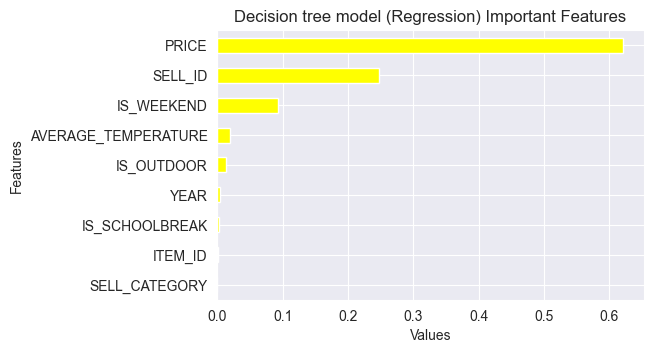

In [101]:
figure(figsize=(5.5,3.5))
combine.sort_values().plot.barh(color='yellow')
plt.title('Decision tree model (Regression) Important Features')
plt.xlabel('Values')
plt.ylabel('Features')

In [102]:
#We see here that the most important features are PRICE, SELL_ID, and IS_WEEKEND. 
#AVERAGE_TEMPERATURE has some importance on predicting quantity, but nowhere as much as the other features.
#IS_OUTDOOR, YEAR and IS_SCHOOLBREAK have very little impact on predicting quantity.
#ITEM_ID & SELL_CATEGORY have no notable impact.

In [103]:
#Model 3 - KNN regression model
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3) #using 3 neighbours

In [104]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [105]:
#Checking KNN model fit
from sklearn.metrics import mean_squared_error
from math import sqrt
#These steps will help us evaluate the error for prediction on train set
train_prediction = knn_model.predict(X_train)  
mse = mean_squared_error(y_train, train_prediction)
rmse = sqrt(mse)
rmse  

#Error of 0.03 on estimating quantity on training set.

0.034047666390817875

In [106]:
#Model fit evaluation steps on test set
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse 
   
#Error of 0.04 on estimating quantity on the test set vs on the training set which was 0.03. 
#Small difference in the errors, however, it is notable that the error is lower in the training set vs test set. The fact that it is lower on the larger data pool (training set) is a good thing.

0.04591323548193895

In [107]:
#Visualize & Improve hyper-parameters of KNN model

In [108]:
#Determining the most suitable k value
error_plot_function = []
for i in range(1,11):
    knn_model2 = KNeighborsRegressor(n_neighbors=i)
    knn_model2.fit(X_train, y_train)
    predict_i = knn_model2.predict(X_test)
    error_plot_function.append(np.mean(predict_i!= y_test))

Text(0, 0.5, 'Error Rate')

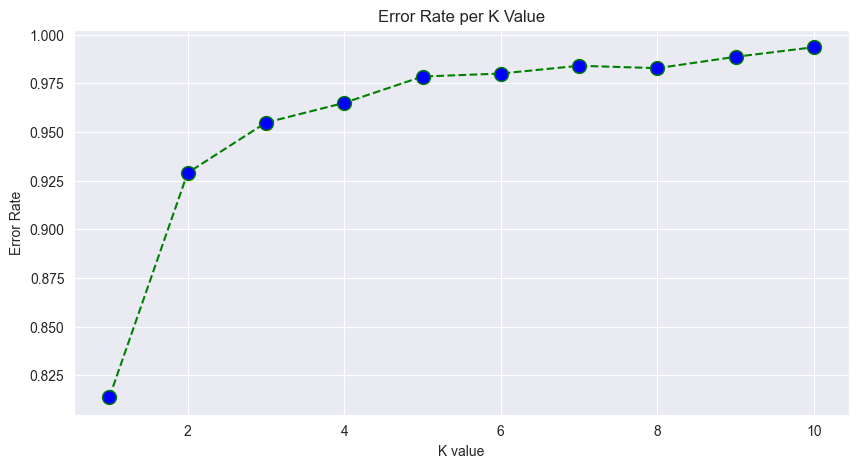

In [109]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), error_plot_function, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate per K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')
#The least amount of error is seen with K=2. However, it is generally recommended to have an odd number for K, so K=2 wouldn't be suitable.
#Futhermore, our predications are less stable as K reaches closer to 1 because there are less groups or points from the predicted value.

In [ ]:
###Comparative analysis of the models  (For complete analysis, reference GitHub README file)

#Model 1 - Linear regression model. This model made the "Condition" number very large on the OLS regression model results. The results notes stated either strong multicollinearity
#or other problems were present. As a result, experimenting with different regression models by removing some independent features from the model may or may not improve the model. 
#Overall, these factors make it difficult to obtain reliable prediction results. You may reference the "Evaluation of OLS Regression Results" after .IPYNB file box [89] for details.

#Model 2 - Regression Decision Tree model. This was the most informative model from the visualization results. The visualization summarized very clearly which features were the 
#most useful based on the R^2 (the coefficient of determination) values. Our training data was comprised of 9 independent variables that were a combination of numeric and categorical. 
#By splitting the data into a tree shape where we evaluate predictions of quantity by each independent variable, we are able to utilize each feature as it pertains to the prediction, no matter the type of data in an effective manner.

#Model 3 - KNN regression model. The least amount of error was seen with K=2. KNN predications are less stable as K reaches closer to 1 because there are less groups or points 
#from the predicted value, which is why it is generally recommended to have an odd number for K, and K=2 wouldn't be suitable or stable enough to have an effective KNN model in 
#this case. Overall, this model was not as meaningful as model 1 or 2, because it's hyperparameters appeared problematic to improve based on the K value issue.

In [ ]:
###Conclusion (For complete conclusion, reference GitHub README file)

##Concluding on research questions

#We can conclude that it is possible for quantity to be predicted using price and time of year features, however the level of importance or strength of prediction is either 
#"moderate" or "low" depending on the time of year feature (IS_WEEKEND, AVERAGE_TEMPERATURE, IS_OUTDOOR, IS_SCHOOLBREAK).
#You may reference the .IPYNB file box [101] "Decision Tree Model Regression - Important Features for the R^2 visualization" for details.

#We could say that the same time of year features would influence beverage sales volume to the extent that they are important as predictors, but that would be a pre-mature conclusion 
#without discussion of how this could be modeled and measured.

#To predict beverage sales volumes by time of time of year (since there are only 3 beverages), one approach would be to make a slight modification to the dataset by setting up 3 new 
#columns labelled, "IS_COFFEE", "IS_COKE" and "IS_LEMONADE". The values for the columns would be populated based on the "ITEM_NAME" column values (an existing column that describes 
#the name of items sold in text). To set this up, for "IS_COFFEE", we would check if "ITEM_NAME" has coffee, if true, then the value would be 1, else it would be 0. Repeating the same
#steps for "IS_COKE" and "IS_LEMONADE". We can then feed the new columns in our model to make predictions for specific beverages. Hyperparameters of the model should be re-assessed for 
#model efficiency.

In [ ]:
##Comparison of research against related-works (For complete comparison, reference GitHub README file)

#Other researchers have developed pricing models using the same dataset.

#One researcher states the problem as, “The objective is to set, for a specific day, the optimal price of a product, maximizing profits.” (Javivaleiras, n.d.). 
#Another states, “As a data scientist, it is our task to figure out the optimal prices to set for these items.” (Pratx, 2021). While I had choosen a similar study on price
#elasticity for the burger café dataset as these researchers, my research focused on how the time of year related features are related to optimization. My problem, “How does 
#the time of year impact price elasticity of burger café menu items?” analyzes how price optimization varies by product on factors such as temperature, school breaks, weekends
#and outdoor sales. My follow-up questions, “How can burger café menu item prices be modeled by time of year?" explores different types of regression models, and, “How can beverages'
#sales volume be modeled by time of year?” proposes how the data can be structured to have a model predict volume by beverage type that comprises relevant time of year features.

#By investigating price elasticity by time of year using a variety of regression based alogrithms, I was able to generate models to predict quantity. I was also able to evaluate 
#model effectiveness and stability. Futhermore, steps to model beverage sales volume by time of year gather critical insight for business decisions surrounding seasonal pricing 
#and marketing. The different focus areas on price elasticity give a unique data mining and knowledge discovery view of the burgermenu dataset.